# Introduction

For starters we will use ten different actors, denoted by different video id:s.


We will apply LOGO CV (Leave One Group Out cross-validation)

We will later have to take into account variables like mode (prosody or vocalization) and intensity (1-4) in the cross validation scheme. 

However for the first run it will be fine to include all without taking such factors into account.



In [27]:
import os
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import sklearn as sk
import scipy
from dotenv import load_dotenv

# Working dir

In [28]:
module_path = os.path.abspath(os.path.join('../../'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [29]:
from src.preprocessing.sql_handling.execute_sql import execute_sql_pandas

# Paths

In [30]:
load_dotenv()

# path to save figures
output_path = os.getenv("VIDEO_OUT")

# Global configuration path
glob_conf_path = '../global_config.py'

# Load global variables

In [31]:
exec(open(glob_conf_path).read())

# Select data from DB

We only select data that satisfies following three conditions:

* Success == 1
* Confidence rate >= 0.98
* mix (mixed emotions) = False(0)

We also only select the following six video_ids: 'A101', 'A102', 'A18', 'A200'

In [32]:
query = """SELECT filename,
video_id,
emotion_1,
emotion_1_id,
AU01_r,
AU02_r,
AU04_r,
AU05_r,
AU06_r,
AU07_r,
AU09_r,
AU10_r,
AU12_r,
AU14_r,
AU15_r,
AU17_r,
AU20_r,
AU23_r,
AU25_r,
AU26_r,
AU45_r
FROM openface
WHERE success = 1 
AND confidence >= 0.98 
AND mix = 0
AND (intensity_level = 4 OR emotion_1 = 'neu')
AND situation = 1 
AND mode = 'v'"""
df, read_duration = execute_sql_pandas(query)

In [33]:
print("query executed in: {} seconds".format(read_duration))

query executed in: 52.956 seconds


In [34]:
df

,filename,video_id,emotion_1,emotion_1_id,AU01_r,AU02_r,AU04_r,AU05_r,AU06_r,AU07_r,...,AU10_r,AU12_r,AU14_r,AU15_r,AU17_r,AU20_r,AU23_r,AU25_r,AU26_r,AU45_r
0,A223_ele_v_4,A223,ele,8,0.37,0.00,0.52,0.00,0.00,0.00,...,0.00,0.07,0.00,0.0,0.73,0.88,1.42,0.0,0.00,0.14
1,A223_ele_v_4,A223,ele,8,0.39,0.00,0.56,0.00,0.00,0.00,...,0.00,0.04,0.00,0.0,0.88,0.97,1.44,0.0,0.00,0.05
2,A223_ele_v_4,A223,ele,8,0.42,0.00,0.61,0.00,0.00,0.00,...,0.00,0.02,0.00,0.0,0.95,1.02,1.40,0.0,0.00,0.08
3,A223_ele_v_4,A223,ele,8,0.43,0.00,0.51,0.00,0.00,0.00,...,0.00,0.03,0.00,0.0,0.94,0.99,1.33,0.0,0.00,0.09
4,A223_ele_v_4,A223,ele,8,0.54,0.00,0.55,0.00,0.00,0.00,...,0.00,0.03,0.00,0.0,0.91,0.97,1.30,0.0,0.00,0.09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
393301,A303_sad_v_4,A303,sad,6,1.00,0.09,0.56,0.00,0.93,1.03,...,2.03,1.13,0.40,0.0,1.11,0.00,0.08,0.0,0.90,0.00
393302,A303_sad_v_4,A303,sad,6,0.63,0.44,0.42,0.01,0.30,0.14,...,0.94,0.50,0.31,0.0,0.74,0.00,0.00,0.0,0.46,0.00
393303,A303_sad_v_4,A303,sad,6,0.65,0.45,0.51,0.29,0.18,0.00,...,0.84,0.44,0.35,0.0,0.67,0.00,0.00,0.0,0.47,0.00
393304,A303_sad_v_4,A303,sad,6,1.56,1.05,0.77,0.63,0.00,0.00,...,0.67,0.38,1.14,0.0,1.50,0.00,0.00,0.0,1.16,0.00


Total number of instances: 393306

Number of Instances per File (before data cleaning)
A205_sad_v_4            1437
A223_ple_v_4            1216
A220_sad_v_4            1084
A205_fea_v_4            1008
A55_neg_sur_v_4_ver2    1005
                        ... 
A334_dist_v_4             54
A34_hap_v_4               48
A34_fea_v_4               45
A303_tri_v_4              44
A332_hap_v_4              34
Name: filename, Length: 1417, dtype: int64



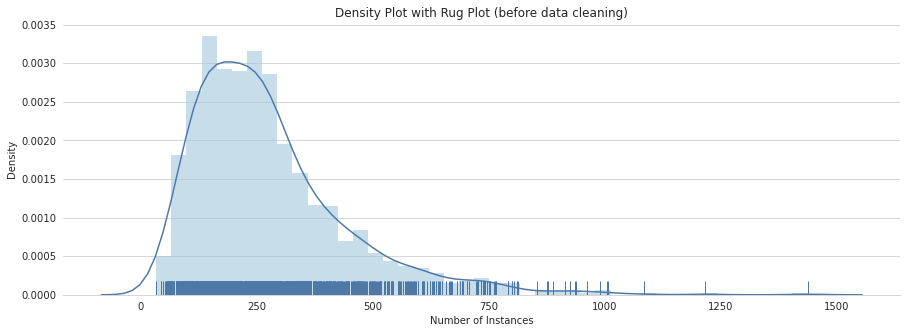


Number of Instances per Video id (before data cleaning)
A55          43276
A223         29190
A205         28606
A220         19931
A102         17227
A327         16184
A67          15345
A26          14118
A64          13895
A101         12670
A221         12011
A323         12005
A72          11998
A334         11698
A103         11377
A218         11229
A227         10639
A207          9762
A200          9761
A18           9266
A65           9013
A74           8662
A91           8104
A75           7729
A332          7266
A201          6507
A303          6384
A21           5461
A337          4922
A34           4825
A050121-R     4245
Name: video_id, dtype: int64


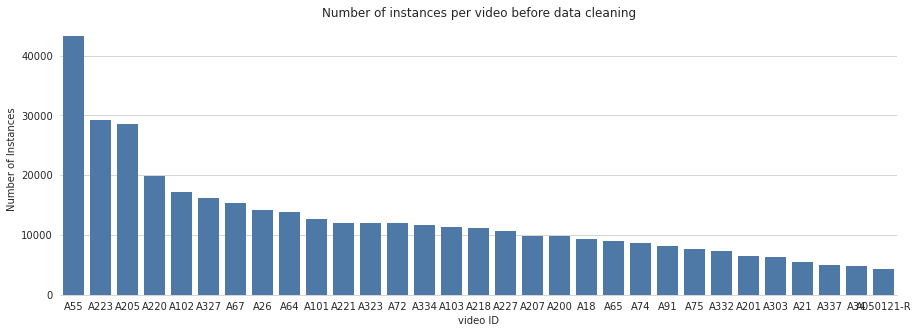


Number of Instances per Emotion (before data cleaning)
dou        11166
mov        11005
sad        10872
nos        10680
emb        10281
anx         9866
ple         9772
env         9709
sha         9668
gui         9666
conf        9603
pea         9582
ins         9547
awe         9522
ele         9313
rel         9293
sex         9264
reg         9176
amu         9168
ten         9167
bor         9108
neg_sur     9089
conc        9070
disa        9034
sat         8862
scha        8810
cont        8713
adm         8527
pos_sur     8522
int         8501
gra         8326
sar         8247
hop         8246
det         8236
rej         8224
dist        8024
exc         7939
pri         7791
hap         7731
neu         7668
tri         7401
fea         7394
disg        7106
ang         6417
Name: emotion_1, dtype: int64


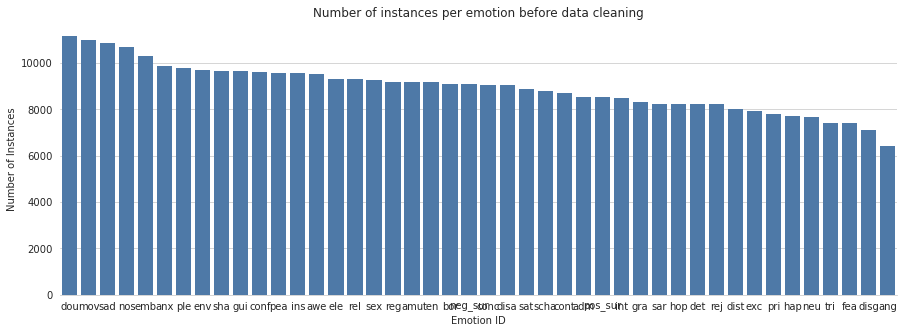

In [35]:
print("Total number of instances: {}".format(len(df)))
print()


print("Number of Instances per File (before data cleaning)")
file_val_counts_original = df["filename"].value_counts()
print(file_val_counts_original)
print()


x = file_val_counts_original.values
plt.figure(figsize=(15,5))
sns.distplot(x, rug=True, norm_hist=True,
             rug_kws={'color': blue_shades[0],'alpha':1},
             kde_kws={'color': blue_shades[0],'alpha':1},
             hist_kws={'color': blue_shades[1], 'alpha':0.6}
            )
plt.xlabel('Number of Instances')
plt.ylabel('Density')
plt.grid(False,axis='x')
plt.savefig(os.path.join(output_path,'charts','report_distribution_before_cleaning.svg'), bbox_inches = 'tight')
plt.title('Density Plot with Rug Plot (before data cleaning)')
plt.savefig(os.path.join(output_path,'charts','distribution_before_cleaning.svg'), bbox_inches = 'tight')
plt.show()
print()


print("Number of Instances per Video id (before data cleaning)")
video_val_counts_original = df["video_id"].value_counts()
print(video_val_counts_original)
plt.figure(figsize=(15,5))
sns.barplot(video_val_counts_original.index, video_val_counts_original.values, saturation=sns_saturation, color=blue_rgb)
plt.title("Number of instances per video before data cleaning")
plt.xlabel('video ID')
plt.ylabel('Number of Instances')
plt.show()
print()


print("Number of Instances per Emotion (before data cleaning)")
emotion_val_counts_original = df["emotion_1"].value_counts()
print(emotion_val_counts_original)
plt.figure(figsize=(15,5))
sns.barplot(emotion_val_counts_original.index, emotion_val_counts_original.values, saturation=sns_saturation, color=blue_rgb)
plt.title("Number of instances per emotion before data cleaning")
plt.xlabel('Emotion ID')
plt.ylabel('Number of Instances')
#plt.xticks(rotation=45)
plt.show()
print()

Lets see how many files we have per video id

In [36]:
print("Number of Instances per video id for every filename")
video_val_counts_original = df[['video_id','filename']].groupby(["video_id"]).filename.nunique().reset_index()
print(video_val_counts_original)
print()

Number of Instances per video id for every filename
     video_id  filename
0   A050121-R        43
1        A101        44
2        A102        44
3        A103        44
4         A18        43
5        A200        43
6        A201        44
7        A205        44
8        A207        44
9         A21        43
10       A218        43
11       A220        44
12       A221        44
13       A223        44
14       A227        44
15        A26        43
16       A303        44
17       A323        44
18       A327        43
19       A332        41
20       A334        43
21       A337        44
22        A34        42
23        A55       117
24        A64        44
25        A65        44
26        A67        39
27        A72        44
28        A74        44
29        A75        42
30        A91        44



# From time series data to average features

In [37]:
from scipy.signal import find_peaks

def my_find_peaks(x):
    """
    This function takes a 1-D array and finds all local maxima by simple comparison of neighboring values. 
    Optionally, a subset of these peaks can be selected by specifying conditions for a peak’s properties.
    """
    th = x.mean()
    val = x.values
    peaks, _ = find_peaks(val, height=th)
    return len(peaks)

In [38]:
df_tmp = df.drop(columns=["video_id", "emotion_1", "emotion_1_id"])

# Compute statistical measures 
df_tmp = df_tmp.groupby(['filename']).agg(['mean',                                    # Arithmetic mean
                                          lambda x: scipy.stats.variation(x),        # Coefficient of variation
                                          lambda x: np.percentile(x, q=20),          # 20th percentile, i.e. below this value 20% of the observations will be found
                                          lambda x: np.percentile(x, q=50),          # 50th percentile, i.e. below this value 50% of the observations will be found
                                          lambda x: np.percentile(x, q=80),          # 80th percentile, i.e. below this value 80% of the observations will be found
                                          lambda x: scipy.stats.iqr(x, rng=(20,80)), # IQR(60%) = 80th percentile - 20th percentile
                                          lambda x: my_find_peaks(x),                # Number of peaks above the adaptive threshold
                                          ]).reset_index().sort_values(by=['filename'], ignore_index=True)

# Rename columns
df_tmp.rename(columns={'<lambda_0>': 'stddevNorm',
                       '<lambda_1>': 'percentile20.0',
                       '<lambda_2>': 'percentile50.0',
                       '<lambda_3>': 'percentile80.0',
                       '<lambda_4>': 'iqr60_80-20',
                       '<lambda_5>': 'numPeaks',
                      }, level=1,inplace=True)

# Impute NaN values
# There might be some NaN values in the dataframe coming from the coefficient of variation (std(x)/mean(x) when mean(x)=0) 
df_tmp.fillna(0, inplace=True)

# Collapse hierarchical index in columns
df_tmp.columns = ['_'.join(col).strip('_') for col in df_tmp.columns.values]

# check for null values
df_tmp.isnull().values.any()

/home/tim/anaconda3/envs/thesis/lib/python3.8/site-packages/scipy/stats/stats.py:1021: RuntimeWarning: invalid value encountered in double_scalars
  return a.std(axis, ddof=ddof) / a.mean(axis)
/home/tim/anaconda3/envs/thesis/lib/python3.8/site-packages/scipy/stats/stats.py:1021: RuntimeWarning: invalid value encountered in double_scalars
  return a.std(axis, ddof=ddof) / a.mean(axis)
/home/tim/anaconda3/envs/thesis/lib/python3.8/site-packages/scipy/stats/stats.py:1021: RuntimeWarning: invalid value encountered in double_scalars
  return a.std(axis, ddof=ddof) / a.mean(axis)
/home/tim/anaconda3/envs/thesis/lib/python3.8/site-packages/scipy/stats/stats.py:1021: RuntimeWarning: invalid value encountered in double_scalars
  return a.std(axis, ddof=ddof) / a.mean(axis)
/home/tim/anaconda3/envs/thesis/lib/python3.8/site-packages/scipy/stats/stats.py:1021: RuntimeWarning: invalid value encountered in double_scalars
  return a.std(axis, ddof=ddof) / a.mean(axis)
/home/tim/anaconda3/envs/thesi

False

In [39]:
df_tmp

,filename,AU01_r_mean,AU01_r_stddevNorm,AU01_r_percentile20.0,AU01_r_percentile50.0,AU01_r_percentile80.0,AU01_r_iqr60_80-20,AU01_r_numPeaks,AU02_r_mean,AU02_r_stddevNorm,...,AU26_r_percentile80.0,AU26_r_iqr60_80-20,AU26_r_numPeaks,AU45_r_mean,AU45_r_stddevNorm,AU45_r_percentile20.0,AU45_r_percentile50.0,AU45_r_percentile80.0,AU45_r_iqr60_80-20,AU45_r_numPeaks
0,A050121-R_adm_v_4,0.115288,1.768192,0.0,0.01,0.204,0.204,5,0.044327,2.168085,...,0.734,0.734,3,0.062404,1.316840,0.0,0.020,0.134,0.134,6
1,A050121-R_amu_v_4,0.278980,1.684702,0.0,0.02,0.350,0.350,6,0.295578,2.019564,...,1.298,1.298,9,0.259728,1.621934,0.0,0.000,0.530,0.530,5
2,A050121-R_ang_v_4,0.234684,2.358941,0.0,0.02,0.258,0.258,3,0.086203,2.743791,...,2.032,2.032,5,0.215823,2.660607,0.0,0.010,0.128,0.128,1
3,A050121-R_anx_v_4,0.100204,1.318408,0.0,0.01,0.230,0.230,6,0.049082,1.843606,...,0.662,0.632,6,0.197959,2.909044,0.0,0.020,0.200,0.200,5
4,A050121-R_awe_v_4,0.039722,1.070524,0.0,0.03,0.080,0.080,9,0.036528,2.365224,...,0.876,0.876,5,0.085972,1.264809,0.0,0.010,0.188,0.188,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1412,A91_scha_v_4,0.125376,1.243199,0.0,0.01,0.310,0.310,11,0.098710,2.018872,...,1.840,1.840,14,0.101989,1.447963,0.0,0.015,0.210,0.210,14
1413,A91_sex_v_4,0.091111,1.439606,0.0,0.01,0.200,0.200,11,0.086959,1.944177,...,0.340,0.320,11,0.749240,1.806074,0.0,0.000,1.160,1.160,6
1414,A91_sha_v_4,0.069068,1.478809,0.0,0.03,0.110,0.110,19,0.051949,2.155706,...,0.490,0.490,28,0.128941,2.338138,0.0,0.020,0.180,0.180,13
1415,A91_ten_v_4,0.143196,1.438138,0.0,0.00,0.350,0.350,13,0.048041,1.928796,...,0.480,0.480,22,0.733986,1.860909,0.0,0.000,1.260,1.260,8


# Normalize training set

Merge on filename index... Merge with metadata afterwards...

A way to normalize the input features/variables is the Min-Max scaler. By doing so, all features will be transformed into the range [0,1] meaning that the minimum and maximum value of a feature/variable is going to be 0 and 1, respectively.

In [40]:
from sklearn import preprocessing

# create a separate dataframe to keep track of index
df_filename = df_tmp[["filename"]]

# get only features
X = df_tmp.drop(columns=['filename'])

min_max_scaler = preprocessing.MinMaxScaler()

# Fit and transform features
X_scaled = min_max_scaler.fit_transform(X)

# Create a dataframe from normalized features
X_scaled_df = pd.DataFrame(data=X_scaled, columns=X.columns.to_list())

# join back on index with filename dataframe
X_scaled_df = df_filename.join(X_scaled_df)

In [41]:
X_scaled_df

,filename,AU01_r_mean,AU01_r_stddevNorm,AU01_r_percentile20.0,AU01_r_percentile50.0,AU01_r_percentile80.0,AU01_r_iqr60_80-20,AU01_r_numPeaks,AU02_r_mean,AU02_r_stddevNorm,...,AU26_r_percentile80.0,AU26_r_iqr60_80-20,AU26_r_numPeaks,AU45_r_mean,AU45_r_stddevNorm,AU45_r_percentile20.0,AU45_r_percentile50.0,AU45_r_percentile80.0,AU45_r_iqr60_80-20,AU45_r_numPeaks
0,A050121-R_adm_v_4,0.050305,0.434539,0.0,0.117647,0.033835,0.033835,0.047059,0.031227,0.240660,...,0.161325,0.168103,0.007519,0.017207,0.066599,0.0,0.285714,0.014665,0.014665,0.052632
1,A050121-R_amu_v_4,0.143123,0.383291,0.0,0.235294,0.064327,0.064327,0.058824,0.356687,0.194345,...,0.314503,0.320043,0.052632,0.156678,0.172415,0.0,0.000000,0.105408,0.105408,0.042105
2,A050121-R_ang_v_4,0.118006,0.797150,0.0,0.235294,0.045113,0.045113,0.023529,0.085471,0.420187,...,0.513851,0.517780,0.022556,0.125645,0.532657,0.0,0.142857,0.013291,0.013291,0.000000
3,A050121-R_anx_v_4,0.041752,0.158454,0.0,0.117647,0.039265,0.039265,0.058824,0.037386,0.139474,...,0.141771,0.140625,0.030075,0.113019,0.618823,0.0,0.285714,0.029789,0.029789,0.042105
4,A050121-R_awe_v_4,0.007457,0.006299,0.0,0.352941,0.007937,0.007937,0.094118,0.021125,0.302135,...,0.199891,0.206358,0.022556,0.033865,0.048553,0.0,0.142857,0.027039,0.027039,0.063158
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1412,A91_scha_v_4,0.056025,0.112290,0.0,0.117647,0.055973,0.055973,0.117647,0.101672,0.194129,...,0.461706,0.466056,0.090226,0.045186,0.112077,0.0,0.214286,0.032081,0.032081,0.136842
1413,A91_sex_v_4,0.036596,0.232848,0.0,0.117647,0.032999,0.032999,0.117647,0.086451,0.170836,...,0.054318,0.056573,0.067669,0.502670,0.236280,0.0,0.000000,0.249771,0.249771,0.052632
1414,A91_sha_v_4,0.024097,0.256911,0.0,0.352941,0.014202,0.014202,0.211765,0.041101,0.236799,...,0.095057,0.102371,0.195489,0.064236,0.420815,0.0,0.285714,0.025206,0.025206,0.126316
1415,A91_ten_v_4,0.066130,0.231946,0.0,0.000000,0.064327,0.064327,0.141176,0.036039,0.166040,...,0.092341,0.099677,0.150376,0.491889,0.255298,0.0,0.000000,0.272686,0.272686,0.073684


In [42]:
# get the metadata from original dataframe
df_metadata = df[["filename", "video_id", "emotion_1_id"]]

# drop all duplicate rows, will collapse dataframe to unique filenames
df_metadata = df_metadata.drop_duplicates()

# merge metadata with temporary dataframe
train_scaled_df = pd.merge(X_scaled_df, df_metadata, on="filename")

In [43]:
train_scaled_df

,filename,AU01_r_mean,AU01_r_stddevNorm,AU01_r_percentile20.0,AU01_r_percentile50.0,AU01_r_percentile80.0,AU01_r_iqr60_80-20,AU01_r_numPeaks,AU02_r_mean,AU02_r_stddevNorm,...,AU26_r_numPeaks,AU45_r_mean,AU45_r_stddevNorm,AU45_r_percentile20.0,AU45_r_percentile50.0,AU45_r_percentile80.0,AU45_r_iqr60_80-20,AU45_r_numPeaks,video_id,emotion_1_id
0,A050121-R_adm_v_4,0.050305,0.434539,0.0,0.117647,0.033835,0.033835,0.047059,0.031227,0.240660,...,0.007519,0.017207,0.066599,0.0,0.285714,0.014665,0.014665,0.052632,A050121-R,5
1,A050121-R_amu_v_4,0.143123,0.383291,0.0,0.235294,0.064327,0.064327,0.058824,0.356687,0.194345,...,0.052632,0.156678,0.172415,0.0,0.000000,0.105408,0.105408,0.042105,A050121-R,13
2,A050121-R_ang_v_4,0.118006,0.797150,0.0,0.235294,0.045113,0.045113,0.023529,0.085471,0.420187,...,0.022556,0.125645,0.532657,0.0,0.142857,0.013291,0.013291,0.000000,A050121-R,12
3,A050121-R_anx_v_4,0.041752,0.158454,0.0,0.117647,0.039265,0.039265,0.058824,0.037386,0.139474,...,0.030075,0.113019,0.618823,0.0,0.285714,0.029789,0.029789,0.042105,A050121-R,34
4,A050121-R_awe_v_4,0.007457,0.006299,0.0,0.352941,0.007937,0.007937,0.094118,0.021125,0.302135,...,0.022556,0.033865,0.048553,0.0,0.142857,0.027039,0.027039,0.063158,A050121-R,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1412,A91_scha_v_4,0.056025,0.112290,0.0,0.117647,0.055973,0.055973,0.117647,0.101672,0.194129,...,0.090226,0.045186,0.112077,0.0,0.214286,0.032081,0.032081,0.136842,A91,15
1413,A91_sex_v_4,0.036596,0.232848,0.0,0.117647,0.032999,0.032999,0.117647,0.086451,0.170836,...,0.067669,0.502670,0.236280,0.0,0.000000,0.249771,0.249771,0.052632,A91,24
1414,A91_sha_v_4,0.024097,0.256911,0.0,0.352941,0.014202,0.014202,0.211765,0.041101,0.236799,...,0.195489,0.064236,0.420815,0.0,0.285714,0.025206,0.025206,0.126316,A91,43
1415,A91_ten_v_4,0.066130,0.231946,0.0,0.000000,0.064327,0.064327,0.141176,0.036039,0.166040,...,0.150376,0.491889,0.255298,0.0,0.000000,0.272686,0.272686,0.073684,A91,28


# Create groups for LOGO CV

We will apply LOGO CV (Leave One Group Out cross-validation)

In [44]:
train_scaled_df.video_id.unique()

array(['A050121-R', 'A101', 'A102', 'A103', 'A18', 'A200', 'A201', 'A205',
       'A207', 'A218', 'A21', 'A220', 'A221', 'A223', 'A227', 'A26',
       'A303', 'A323', 'A327', 'A332', 'A334', 'A337', 'A34', 'A55',
       'A64', 'A65', 'A67', 'A72', 'A74', 'A75', 'A91'], dtype=object)

In [45]:
def get_evens(size):
    ret = []
    for n in range(size):
        if n % 2 == 0:
            ret.append(n)
    return ret

def get_odds(size):
    ret = []
    for n in range(size):
        if n % 2 == 1:
            ret.append(n)
    return ret

In [46]:
import random

video_ids = train_scaled_df.video_id.unique()

# Find random pairs of video_ids
random.seed(seed)

# a list of even numbers
video_ids_1 = get_evens(len(video_ids))

# a list of odd numbers
video_ids_2 = get_odds(len(video_ids))

# shuffle the odd numbers
video_ids_2_shuffled = random.sample(video_ids_2, len(video_ids_2))

# assign groups for video ids by using odd and even numbers respectively
groups = {}
for i, video_id in enumerate(video_ids_1):
    groups[video_ids[video_id]] = i
    
for i, video_id in enumerate(video_ids_2_shuffled):
    groups[video_ids[video_id]] = i
    
print(groups)

# Create a copy
train_scaled_groups_df = train_scaled_df.copy()

# Insert group column
train_scaled_groups_df['group'] = train_scaled_groups_df['video_id'].map(groups)

{'A050121-R': 0, 'A102': 1, 'A18': 2, 'A201': 3, 'A207': 4, 'A21': 5, 'A221': 6, 'A227': 7, 'A303': 8, 'A327': 9, 'A334': 10, 'A34': 11, 'A64': 12, 'A67': 13, 'A74': 14, 'A91': 15, 'A337': 0, 'A26': 1, 'A55': 2, 'A218': 3, 'A65': 4, 'A205': 5, 'A103': 6, 'A323': 7, 'A200': 8, 'A75': 9, 'A223': 10, 'A220': 11, 'A72': 12, 'A332': 13, 'A101': 14}


In [47]:
train_scaled_groups_df

,filename,AU01_r_mean,AU01_r_stddevNorm,AU01_r_percentile20.0,AU01_r_percentile50.0,AU01_r_percentile80.0,AU01_r_iqr60_80-20,AU01_r_numPeaks,AU02_r_mean,AU02_r_stddevNorm,...,AU45_r_mean,AU45_r_stddevNorm,AU45_r_percentile20.0,AU45_r_percentile50.0,AU45_r_percentile80.0,AU45_r_iqr60_80-20,AU45_r_numPeaks,video_id,emotion_1_id,group
0,A050121-R_adm_v_4,0.050305,0.434539,0.0,0.117647,0.033835,0.033835,0.047059,0.031227,0.240660,...,0.017207,0.066599,0.0,0.285714,0.014665,0.014665,0.052632,A050121-R,5,0
1,A050121-R_amu_v_4,0.143123,0.383291,0.0,0.235294,0.064327,0.064327,0.058824,0.356687,0.194345,...,0.156678,0.172415,0.0,0.000000,0.105408,0.105408,0.042105,A050121-R,13,0
2,A050121-R_ang_v_4,0.118006,0.797150,0.0,0.235294,0.045113,0.045113,0.023529,0.085471,0.420187,...,0.125645,0.532657,0.0,0.142857,0.013291,0.013291,0.000000,A050121-R,12,0
3,A050121-R_anx_v_4,0.041752,0.158454,0.0,0.117647,0.039265,0.039265,0.058824,0.037386,0.139474,...,0.113019,0.618823,0.0,0.285714,0.029789,0.029789,0.042105,A050121-R,34,0
4,A050121-R_awe_v_4,0.007457,0.006299,0.0,0.352941,0.007937,0.007937,0.094118,0.021125,0.302135,...,0.033865,0.048553,0.0,0.142857,0.027039,0.027039,0.063158,A050121-R,18,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1412,A91_scha_v_4,0.056025,0.112290,0.0,0.117647,0.055973,0.055973,0.117647,0.101672,0.194129,...,0.045186,0.112077,0.0,0.214286,0.032081,0.032081,0.136842,A91,15,15
1413,A91_sex_v_4,0.036596,0.232848,0.0,0.117647,0.032999,0.032999,0.117647,0.086451,0.170836,...,0.502670,0.236280,0.0,0.000000,0.249771,0.249771,0.052632,A91,24,15
1414,A91_sha_v_4,0.024097,0.256911,0.0,0.352941,0.014202,0.014202,0.211765,0.041101,0.236799,...,0.064236,0.420815,0.0,0.285714,0.025206,0.025206,0.126316,A91,43,15
1415,A91_ten_v_4,0.066130,0.231946,0.0,0.000000,0.064327,0.064327,0.141176,0.036039,0.166040,...,0.491889,0.255298,0.0,0.000000,0.272686,0.272686,0.073684,A91,28,15


In [48]:
save_path = os.path.join(output_path, 'video_data_intensity_train.csv')
train_scaled_groups_df.to_csv(save_path, index=None, header=True)